In [1]:
%load_ext autoreload
%autoreload 2

# Training on the dataset

## Imports

In [3]:
import importlib
import mlp_model
import ensemble_ml_model
from mlp_model import MLPTrainer, MLPConfig, MLP
from data_loader import load_train_data, load_test_data
from ensemble_ml_model import EnsembleMLP, EnsembleMLPConfig
importlib.reload(mlp_model)
importlib.reload(ensemble_ml_model)


<module 'ensemble_ml_model' from '/home/artypuppet/COMP432-Project/notebooks/ensemble_ml_model.py'>

## Load the data and config

In [3]:
X, y = load_train_data()

In [4]:
config_path = "../configs/mlp_config.json"
model_config = MLPConfig.load_from_config(config_path)

## Train

Learning rate: 0.000500
Epoch 1/75
                loss  accuracy  precision    recall  f1_score
Train       2.986853  0.259033   0.248121  0.258648  0.249631
Validation  2.378399  0.408977   0.461310  0.410670  0.401409
New best loss: 2.3784
Learning rate: 0.000500
Epoch 2/75
New best loss: 1.9911
Learning rate: 0.000499
Epoch 3/75
New best loss: 1.8199
Learning rate: 0.000498
Epoch 4/75
New best loss: 1.7062
Learning rate: 0.000497
Epoch 5/75
New best loss: 1.6491
Learning rate: 0.000495
Epoch 6/75
                loss  accuracy  precision    recall  f1_score
Train       1.036160  0.811154   0.811054  0.811024  0.810948
Validation  1.581367  0.652760   0.668518  0.653645  0.652841
New best loss: 1.5814
Learning rate: 0.000492
Epoch 7/75
New best loss: 1.5321
Learning rate: 0.000489
Epoch 8/75
New best loss: 1.5125
Learning rate: 0.000486
Epoch 9/75
New best loss: 1.4694
Learning rate: 0.000483
Epoch 10/75
New best loss: 1.4653
Learning rate: 0.000479
Epoch 11/75
                loss 

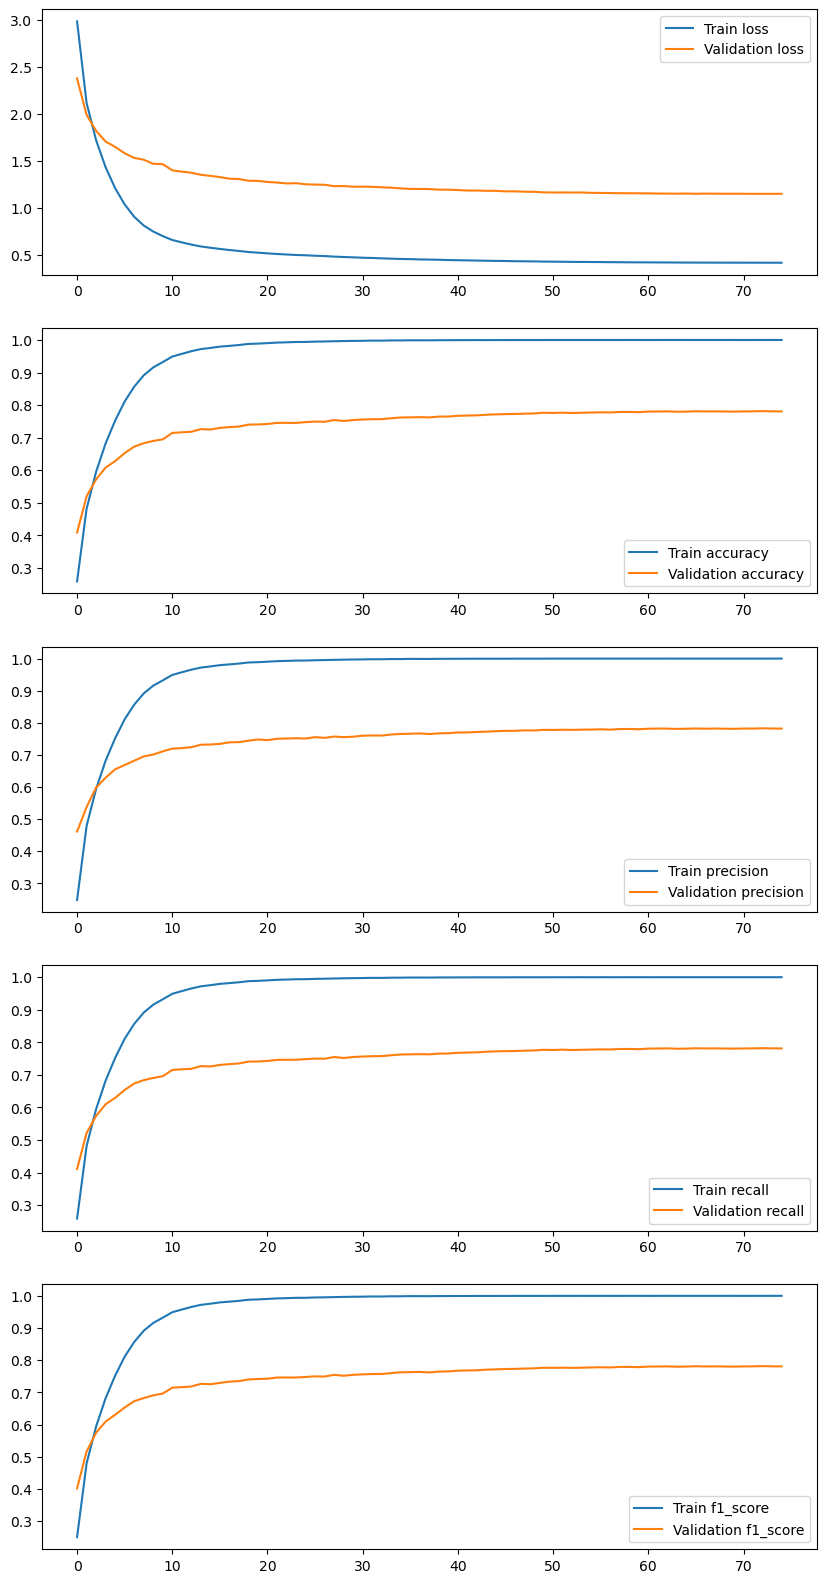

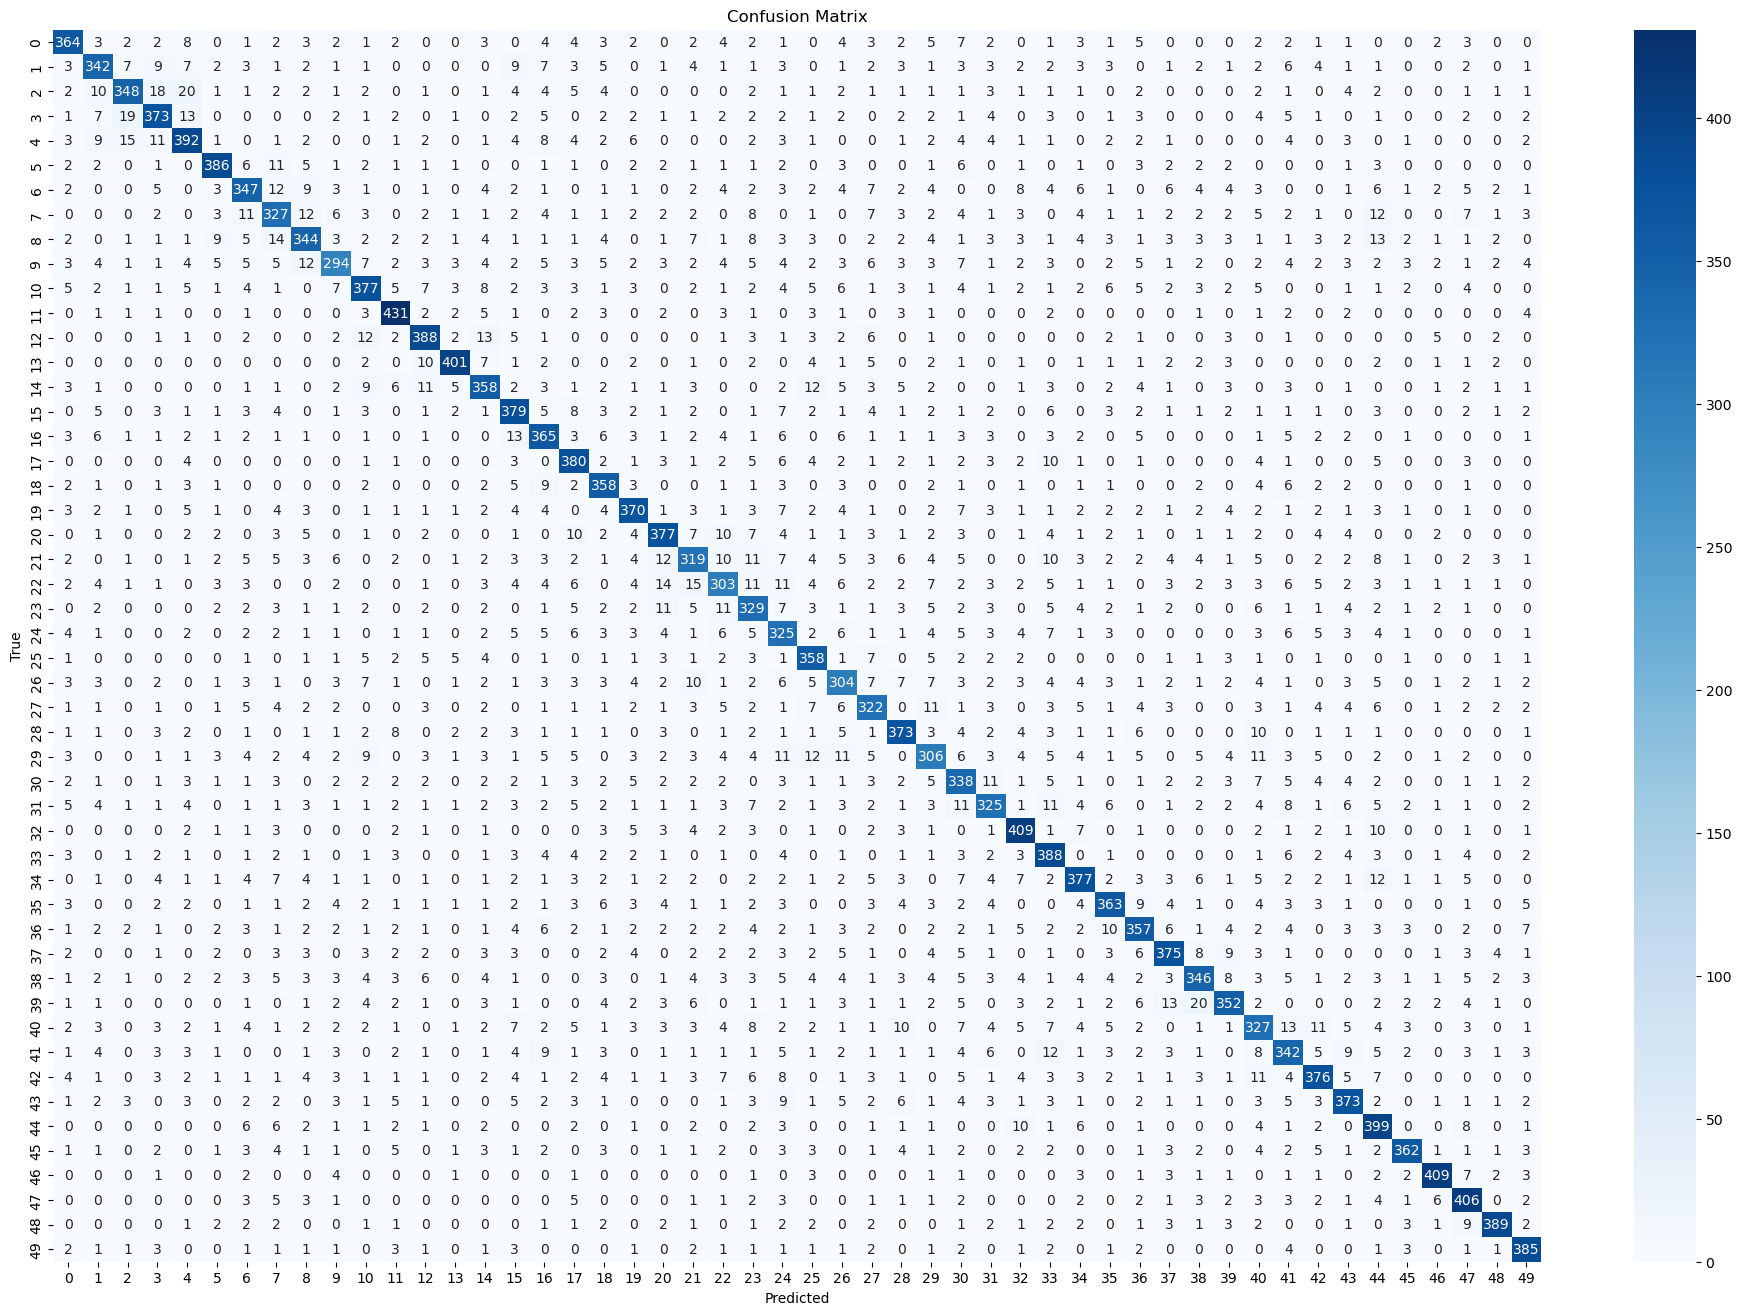

In [ ]:
trainer = MLPTrainer(model_config)
trainer.setup_dataloaders(X, y)
train_stats, val_stats, best_model_path, best_epoch = trainer.train()


## Training for final testing   

In [5]:
# Then train on full dataset
# Reinitialize the trainer (or create a new one) to start fresh
trainer_full = MLPTrainer(model_config)
trainer_full.setup_full_dataloader(X, y)  # Use full dataset
final_model_path = trainer_full.train_full_dataset(num_epochs=58)


Learning rate: 0.000500
Epoch 1/58
           loss  accuracy  precision    recall  f1_score
Train  2.747262  0.326101   0.318789  0.326097  0.320672
Learning rate: 0.000500
Epoch 2/58
Learning rate: 0.000499
Epoch 3/58
Learning rate: 0.000497
Epoch 4/58
Learning rate: 0.000494
Epoch 5/58
Learning rate: 0.000491
Epoch 6/58
           loss  accuracy  precision    recall  f1_score
Train  0.943503  0.854028   0.854018  0.854027  0.853967
Learning rate: 0.000487
Epoch 7/58
Learning rate: 0.000482
Epoch 8/58
Learning rate: 0.000477
Epoch 9/58
Learning rate: 0.000471
Epoch 10/58
Learning rate: 0.000465
Epoch 11/58
           loss  accuracy  precision    recall  f1_score
Train  0.641616  0.965695   0.965713  0.965694  0.965697
Learning rate: 0.000457
Epoch 12/58
Learning rate: 0.000450
Epoch 13/58
Learning rate: 0.000441
Epoch 14/58
Learning rate: 0.000432
Epoch 15/58
Learning rate: 0.000423
Epoch 16/58
           loss  accuracy  precision    recall  f1_score
Train  0.561201  0.988164   0.9881

In [7]:
X, test_ids = load_test_data(None, return_ids=True)

In [8]:
_ = trainer_full.test(X, ids=test_ids)

# Using an ensemble model

In [4]:
X, y = load_train_data()


Training fold 1/5

Train size: 92324, Val size: 23082
Learning rate: 0.000500
Epoch 1/75
                loss  accuracy  precision    recall  f1_score
Train       2.847630  0.301124   0.291831  0.301119  0.294160
Validation  2.304607  0.438827   0.476680  0.438848  0.432445
New best loss: 2.3046
Learning rate: 0.000500
Epoch 2/75
New best loss: 1.9685
Learning rate: 0.000499
Epoch 3/75
New best loss: 1.7924
Learning rate: 0.000498
Epoch 4/75
New best loss: 1.6750
Learning rate: 0.000497
Epoch 5/75
New best loss: 1.5795
Learning rate: 0.000495
Epoch 6/75
                loss  accuracy  precision    recall  f1_score
Train       0.954639  0.849963   0.849976  0.849960  0.849915
Validation  1.541271  0.671476   0.687229  0.671468  0.672924
New best loss: 1.5413
Learning rate: 0.000492
Epoch 7/75
New best loss: 1.5010
Learning rate: 0.000489
Epoch 8/75
New best loss: 1.4545
Learning rate: 0.000486
Epoch 9/75
New best loss: 1.4411
Learning rate: 0.000483
Epoch 10/75
New best loss: 1.4004
Le

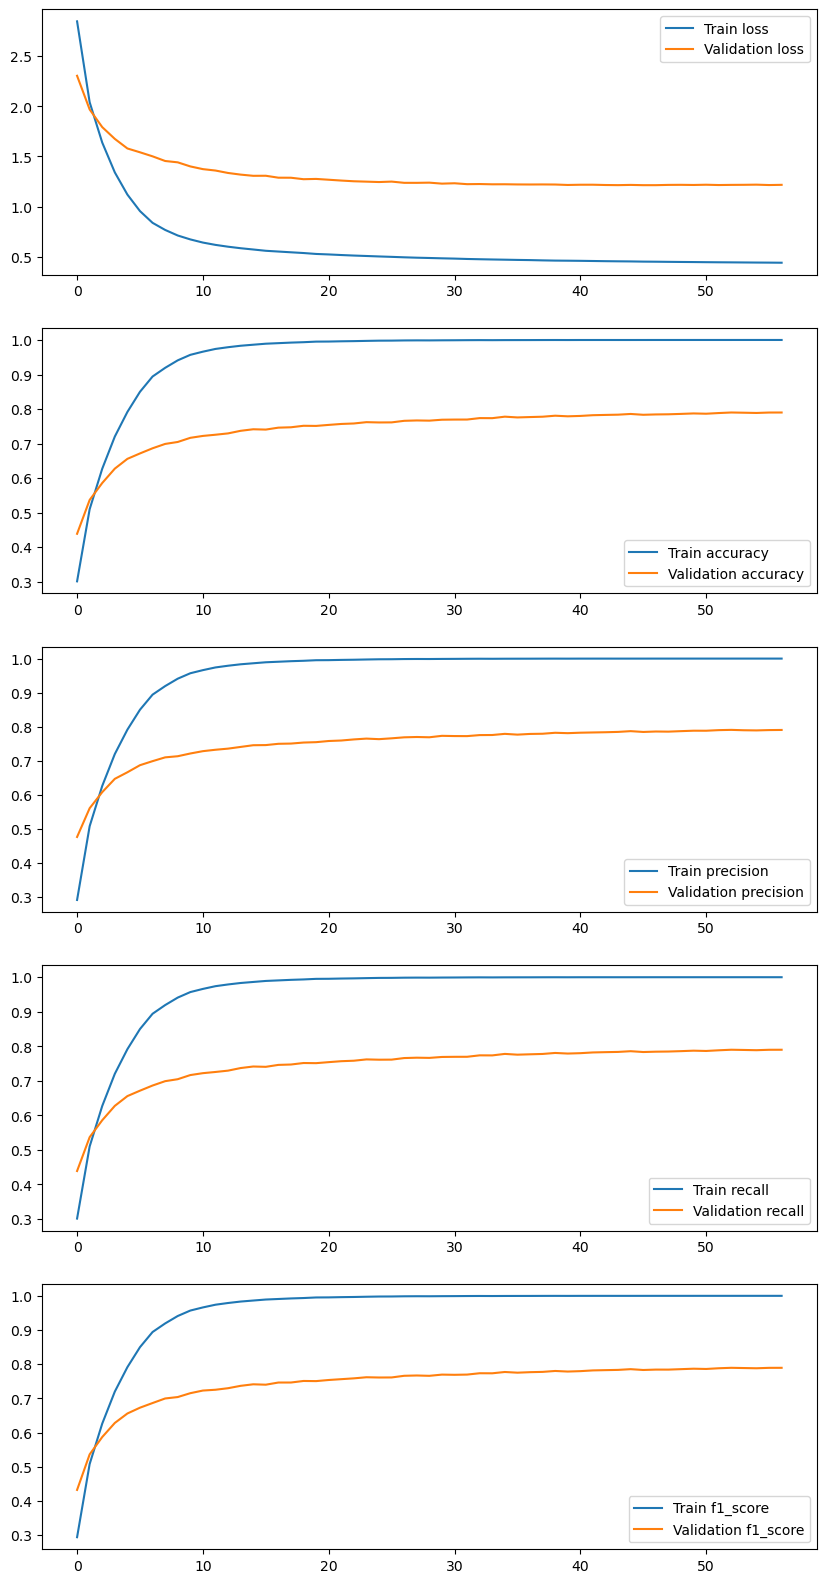

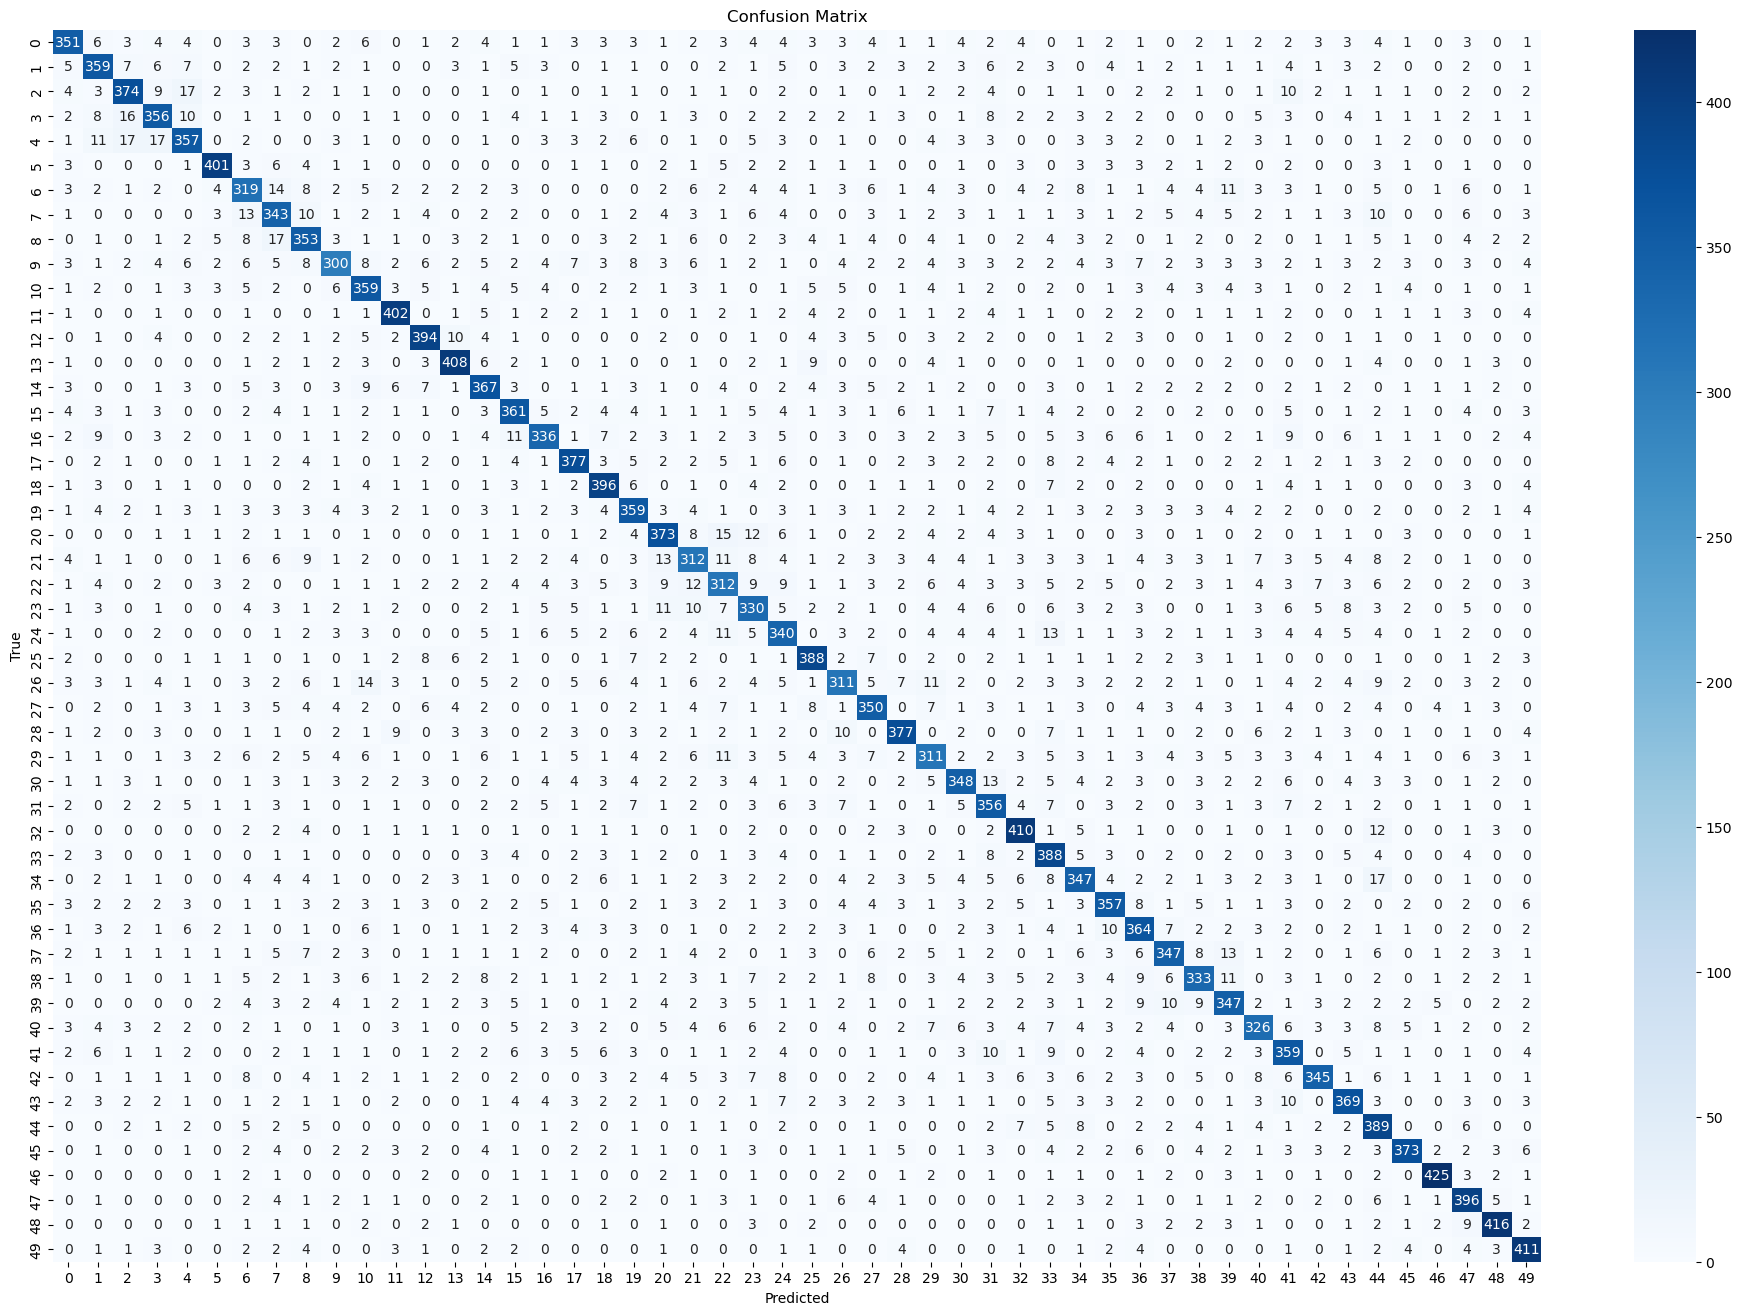

Saved fold 1 model to ../models/ensemble_mlp_fold_0.pth

Training fold 2/5

Train size: 92325, Val size: 23081
Learning rate: 0.000500
Epoch 1/75
                loss  accuracy  precision    recall  f1_score
Train       2.825341  0.304782   0.296307  0.304778  0.297785
Validation  2.290881  0.444478   0.464596  0.444483  0.440166
New best loss: 2.2909
Learning rate: 0.000500
Epoch 2/75
New best loss: 1.9640
Learning rate: 0.000499
Epoch 3/75
New best loss: 1.7989
Learning rate: 0.000498
Epoch 4/75
New best loss: 1.6849
Learning rate: 0.000497
Epoch 5/75
New best loss: 1.6013
Learning rate: 0.000495
Epoch 6/75
                loss  accuracy  precision    recall  f1_score
Train       0.956072  0.851611   0.851541  0.851609  0.851518
Validation  1.547770  0.671071   0.685238  0.671082  0.671763
New best loss: 1.5478
Learning rate: 0.000492
Epoch 7/75
New best loss: 1.5064
Learning rate: 0.000489
Epoch 8/75
New best loss: 1.4629
Learning rate: 0.000486
Epoch 9/75
New best loss: 1.4440
Lear

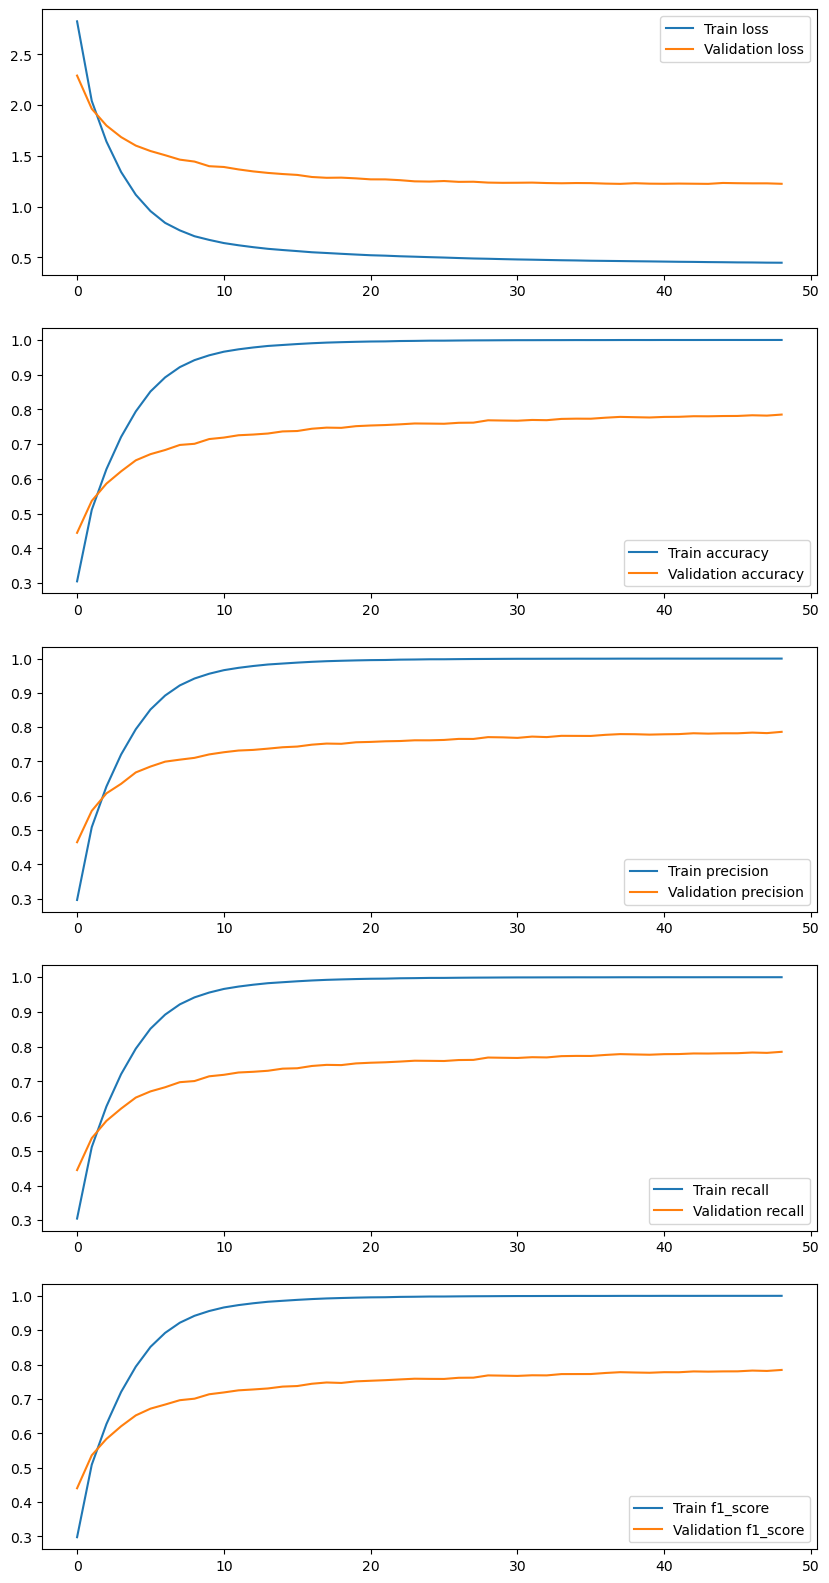

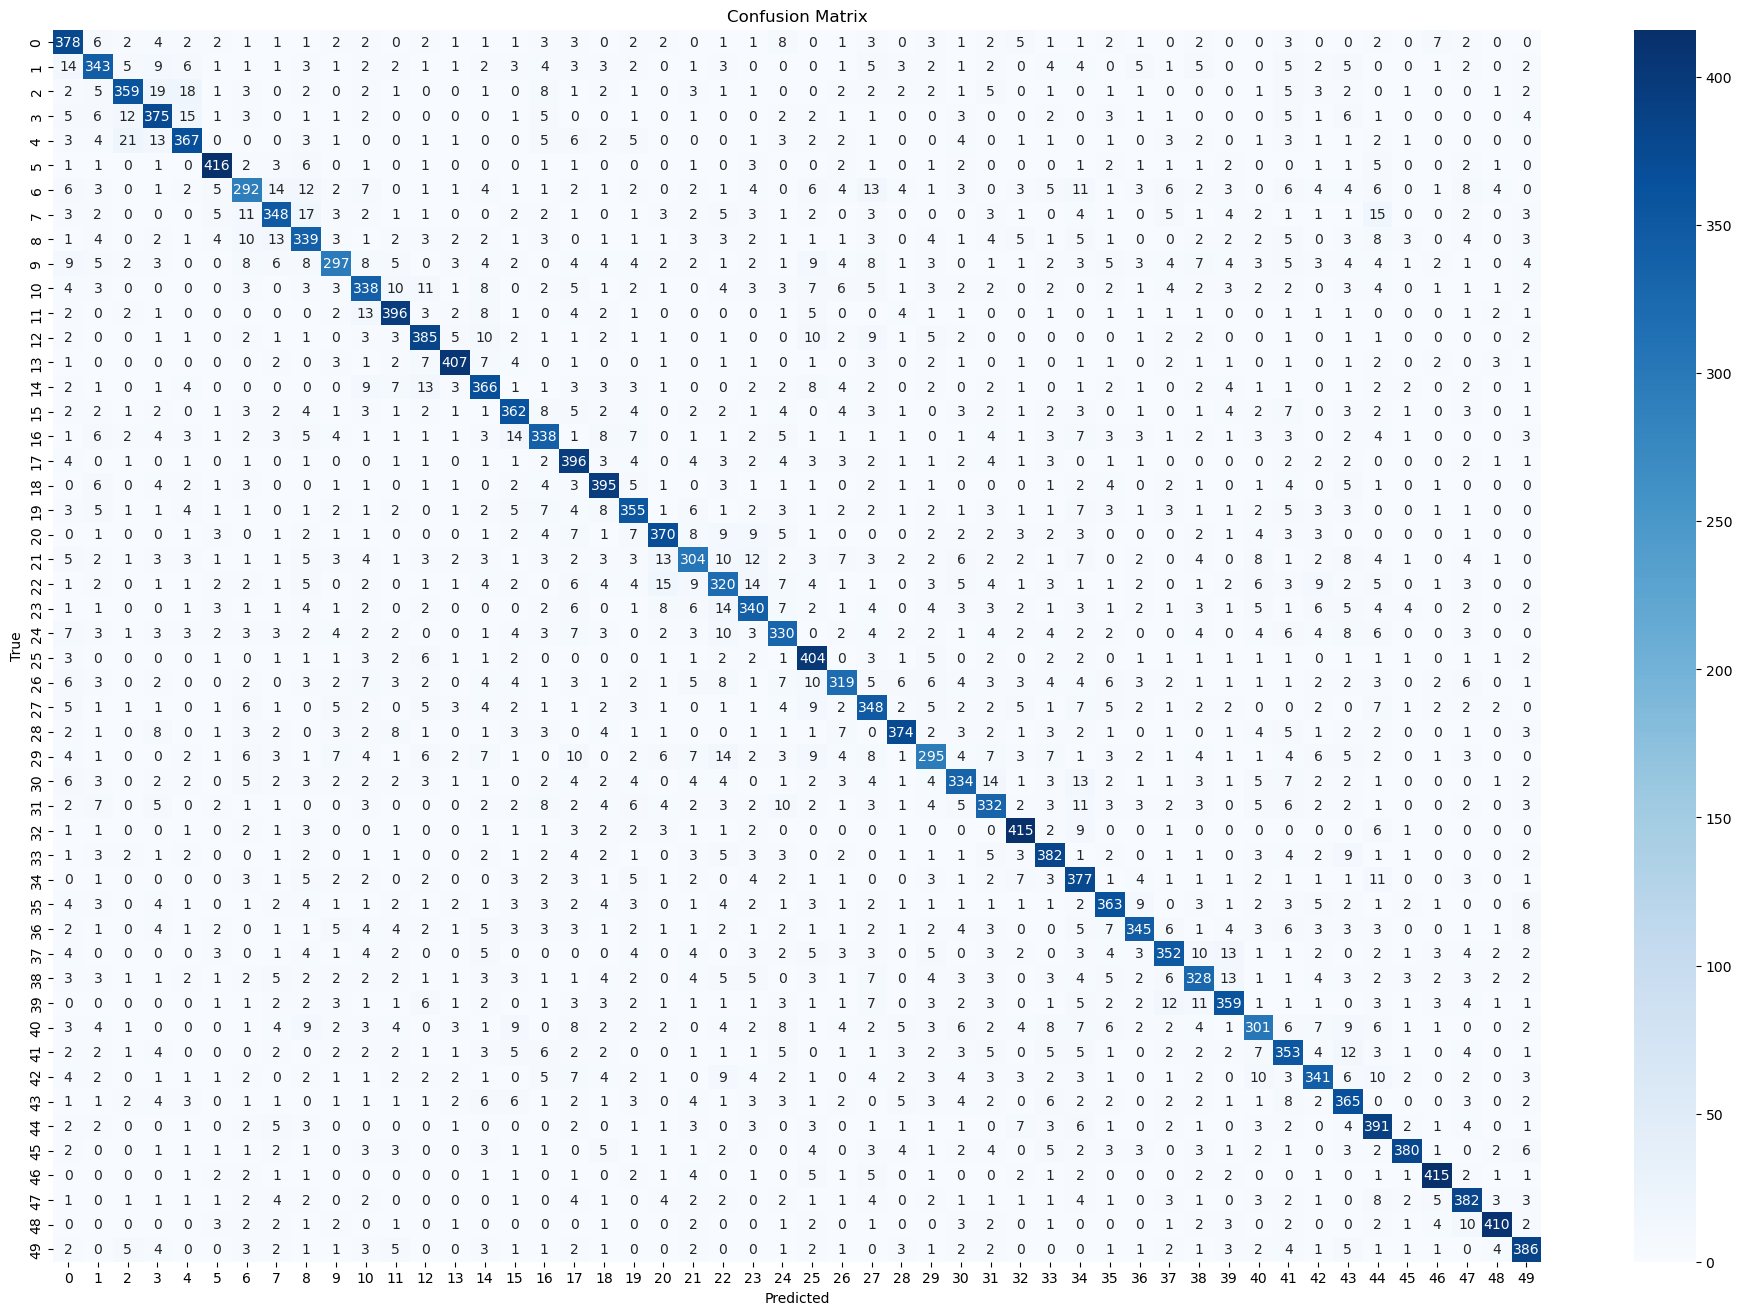

Saved fold 2 model to ../models/ensemble_mlp_fold_1.pth

Training fold 3/5

Train size: 92325, Val size: 23081
Learning rate: 0.000500
Epoch 1/75
                loss  accuracy  precision    recall  f1_score
Train       2.825197  0.305908   0.298340  0.305906  0.299539
Validation  2.265596  0.444911   0.477186  0.444921  0.444619
New best loss: 2.2656
Learning rate: 0.000500
Epoch 2/75
New best loss: 1.9688
Learning rate: 0.000499
Epoch 3/75
New best loss: 1.7827
Learning rate: 0.000498
Epoch 4/75
New best loss: 1.6711
Learning rate: 0.000497
Epoch 5/75
New best loss: 1.6100
Learning rate: 0.000495
Epoch 6/75
                loss  accuracy  precision    recall  f1_score
Train       0.952445  0.851774   0.851800  0.851773  0.851716
Validation  1.539405  0.671461   0.685292  0.671483  0.672303
New best loss: 1.5394
Learning rate: 0.000492
Epoch 7/75
New best loss: 1.4962
Learning rate: 0.000489
Epoch 8/75
New best loss: 1.4722
Learning rate: 0.000486
Epoch 9/75
New best loss: 1.4492
Lear

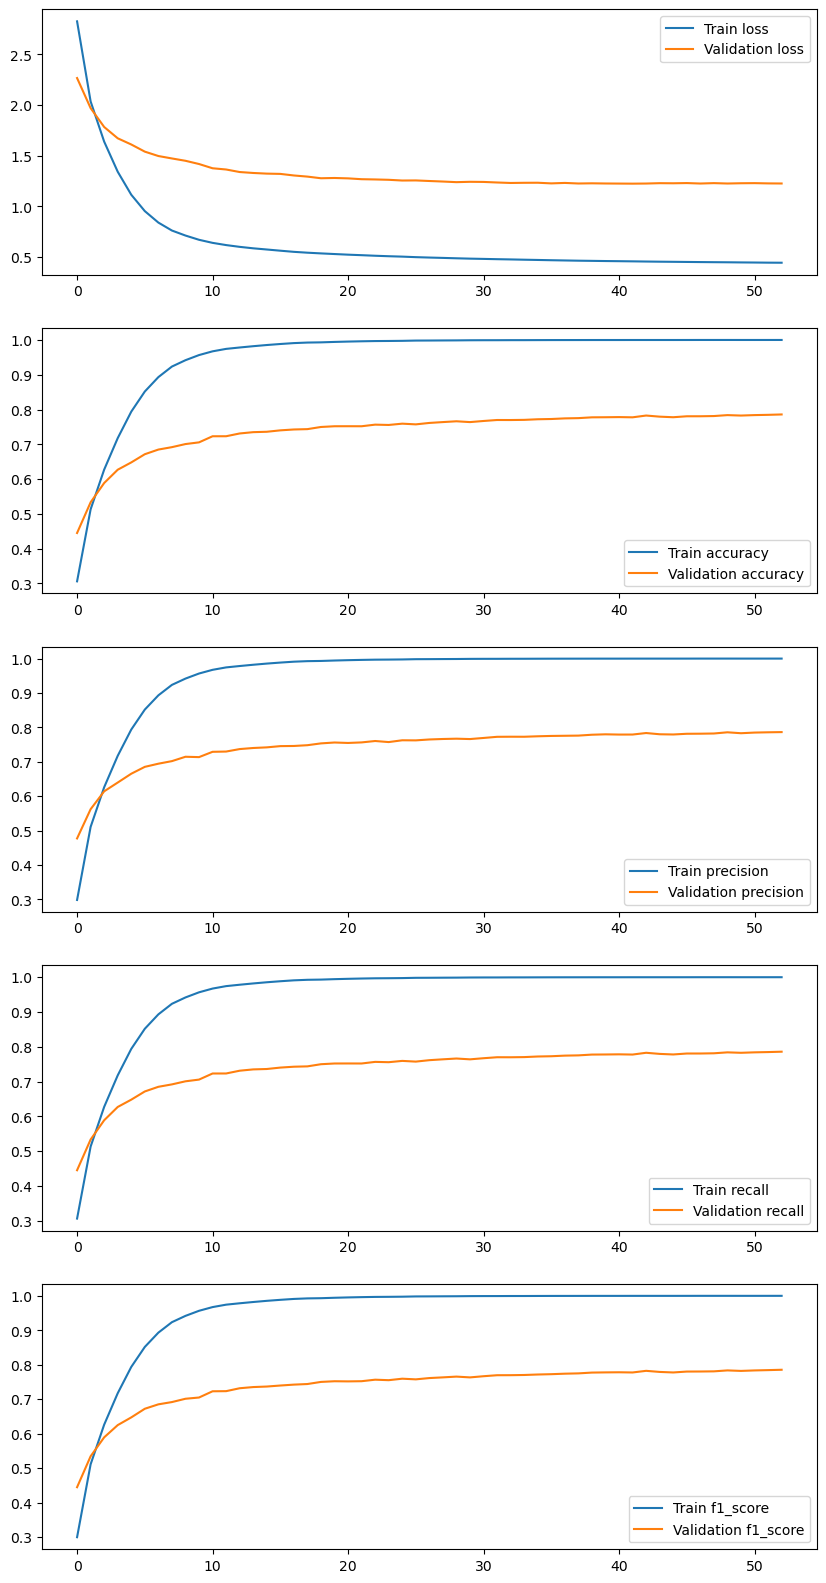

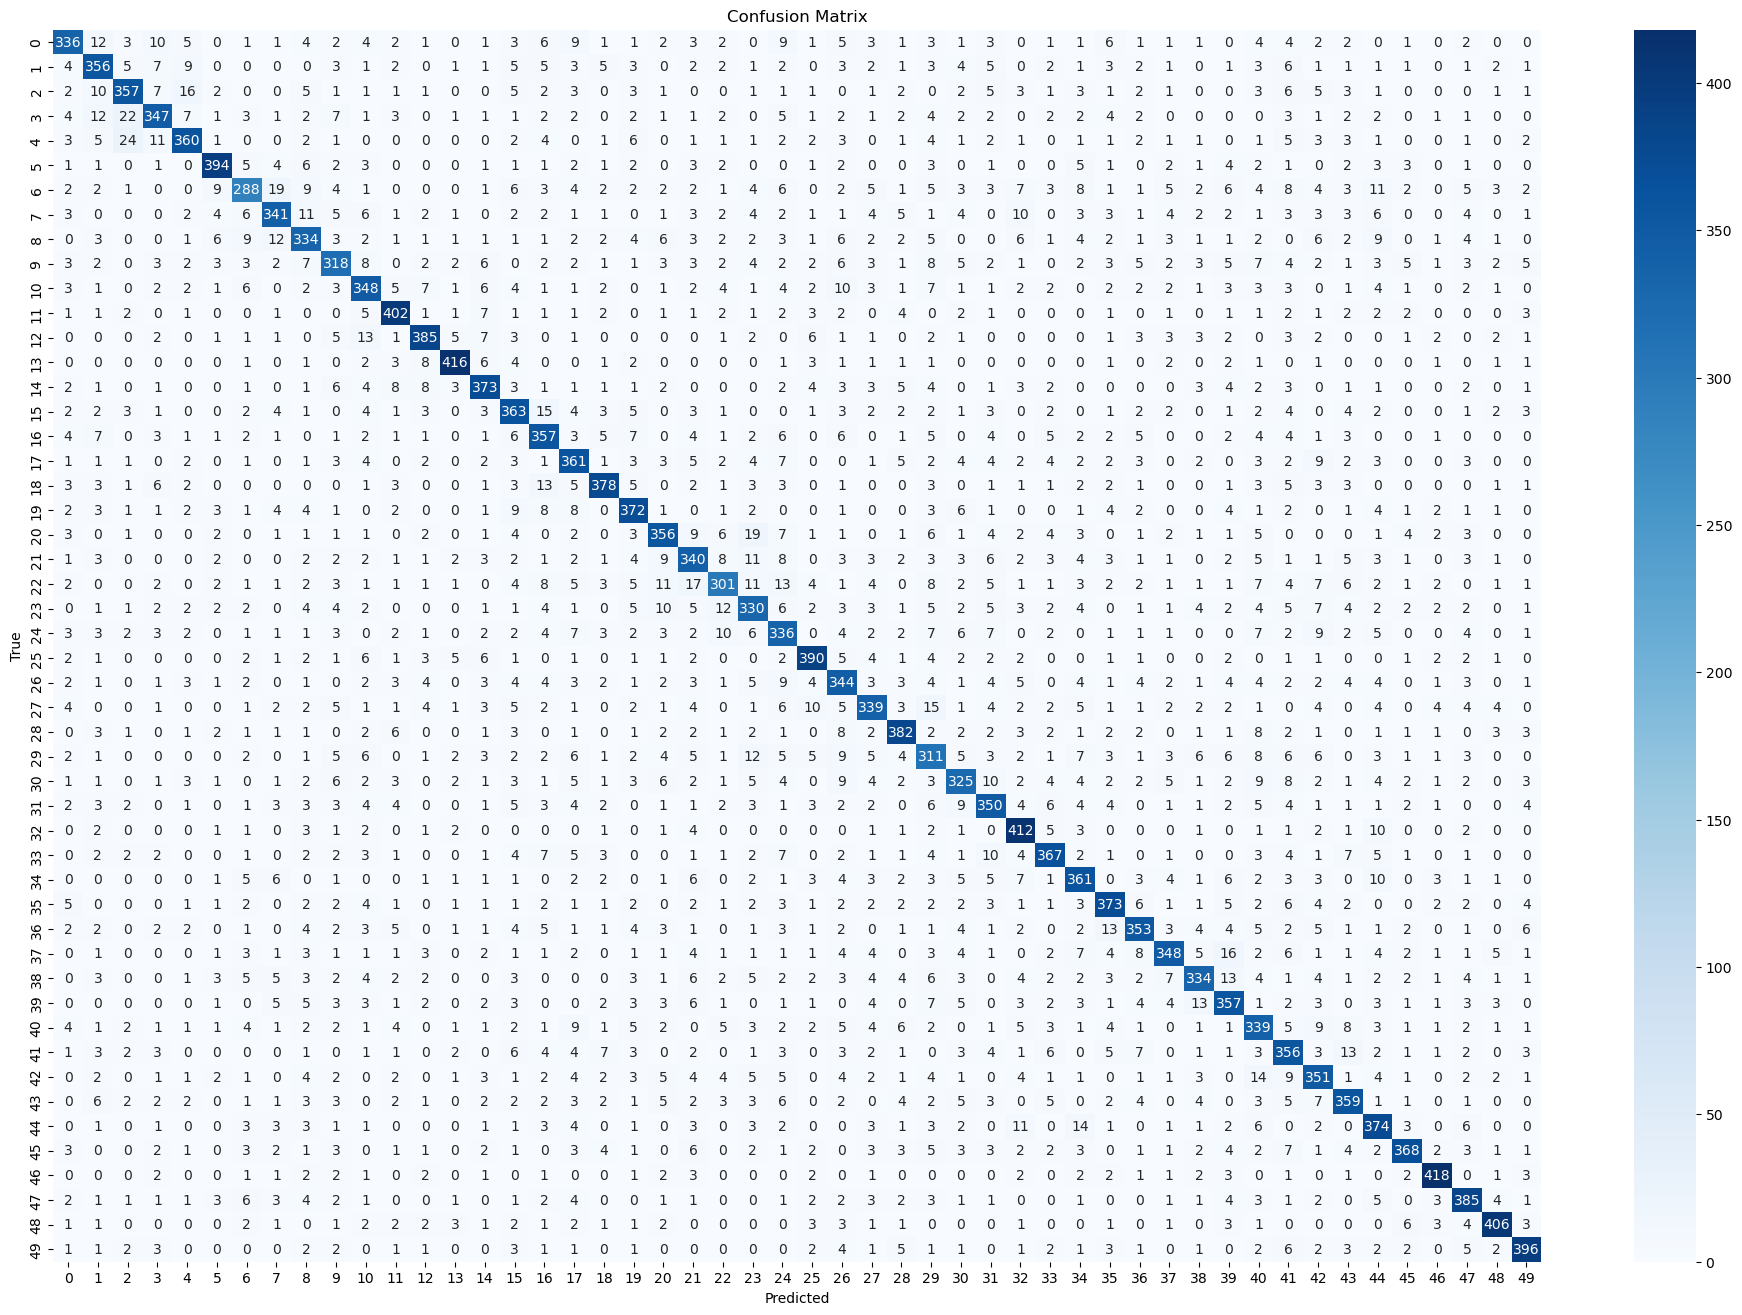

Saved fold 3 model to ../models/ensemble_mlp_fold_2.pth

Training fold 4/5

Train size: 92325, Val size: 23081
Learning rate: 0.000500
Epoch 1/75
                loss  accuracy  precision    recall  f1_score
Train       2.843373  0.304154   0.297540  0.304155  0.298271
Validation  2.321402  0.436116   0.485406  0.436092  0.433072
New best loss: 2.3214
Learning rate: 0.000500
Epoch 2/75
New best loss: 1.9879
Learning rate: 0.000499
Epoch 3/75
New best loss: 1.8116
Learning rate: 0.000498
Epoch 4/75
New best loss: 1.6944
Learning rate: 0.000497
Epoch 5/75
New best loss: 1.6017
Learning rate: 0.000495
Epoch 6/75
                loss  accuracy  precision    recall  f1_score
Train       0.956888  0.850355   0.850365  0.850354  0.850310
Validation  1.559921  0.669338   0.684859  0.669317  0.670327
New best loss: 1.5599
Learning rate: 0.000492
Epoch 7/75
New best loss: 1.5210
Learning rate: 0.000489
Epoch 8/75
New best loss: 1.4659
Learning rate: 0.000486
Epoch 9/75
New best loss: 1.4470
Lear

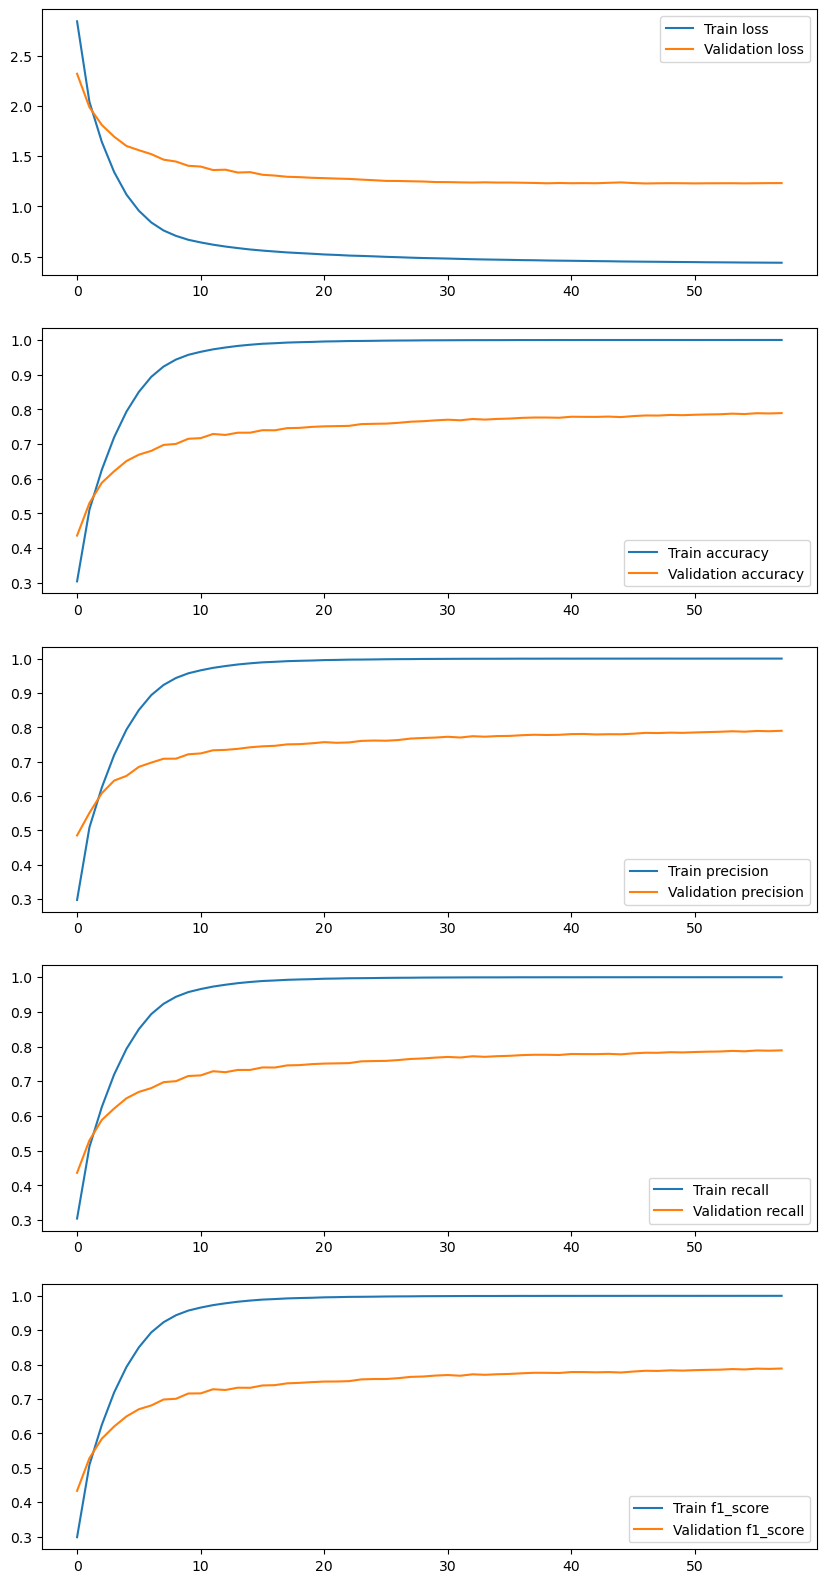

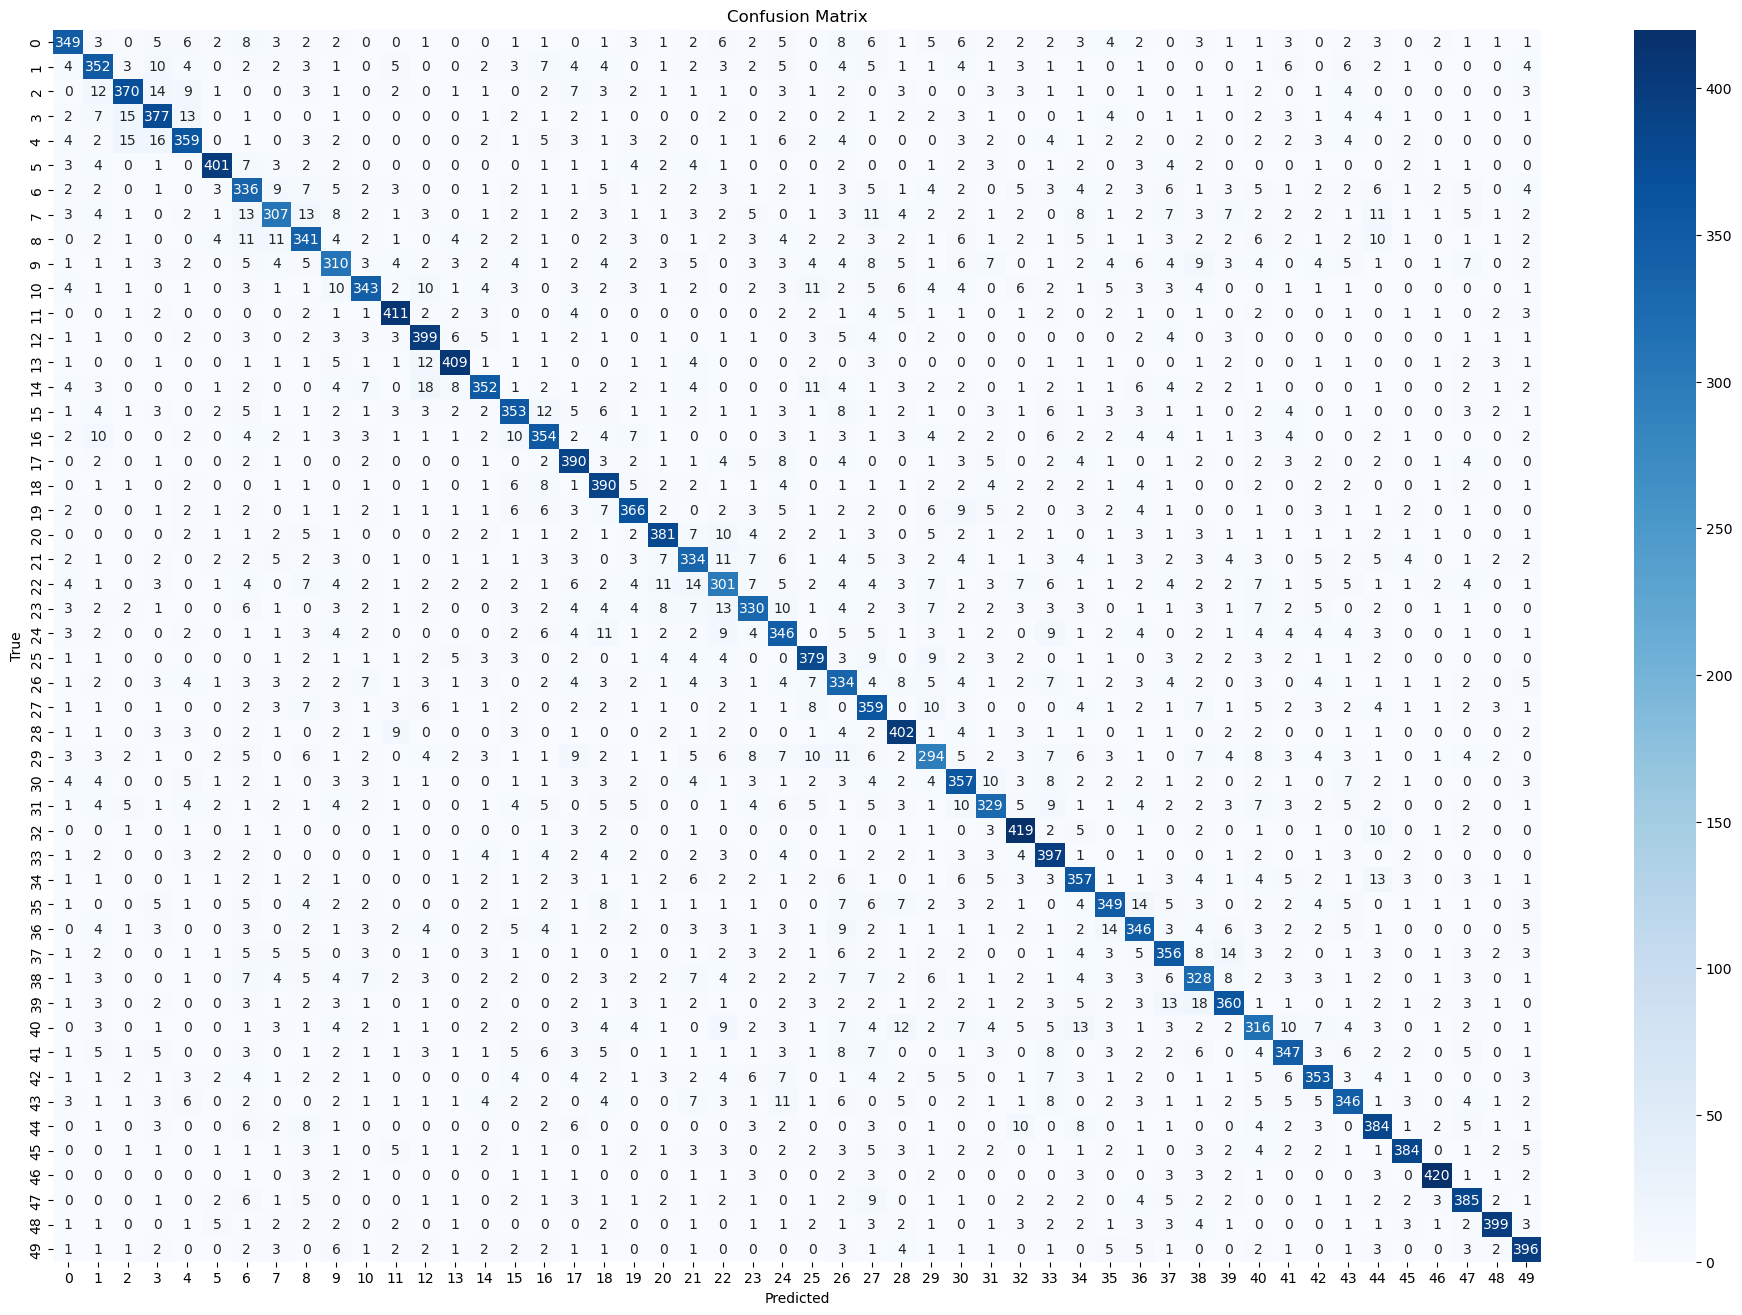

Saved fold 4 model to ../models/ensemble_mlp_fold_3.pth

Training fold 5/5

Train size: 92325, Val size: 23081
Learning rate: 0.000500
Epoch 1/75
                loss  accuracy  precision    recall  f1_score
Train       2.866422  0.299345   0.290581  0.299338  0.292959
Validation  2.275535  0.449287   0.470514  0.449300  0.443664
New best loss: 2.2755
Learning rate: 0.000500
Epoch 2/75
New best loss: 1.9798
Learning rate: 0.000499
Epoch 3/75
New best loss: 1.8189
Learning rate: 0.000498
Epoch 4/75
New best loss: 1.6508
Learning rate: 0.000497
Epoch 5/75
New best loss: 1.5874
Learning rate: 0.000495
Epoch 6/75
                loss  accuracy  precision    recall  f1_score
Train       0.953704  0.850777   0.850757  0.850774  0.850682
Validation  1.547230  0.667259   0.686521  0.667272  0.670415
New best loss: 1.5472
Learning rate: 0.000492
Epoch 7/75
New best loss: 1.4939
Learning rate: 0.000489
Epoch 8/75
New best loss: 1.4541
Learning rate: 0.000486
Epoch 9/75
New best loss: 1.4258
Lear

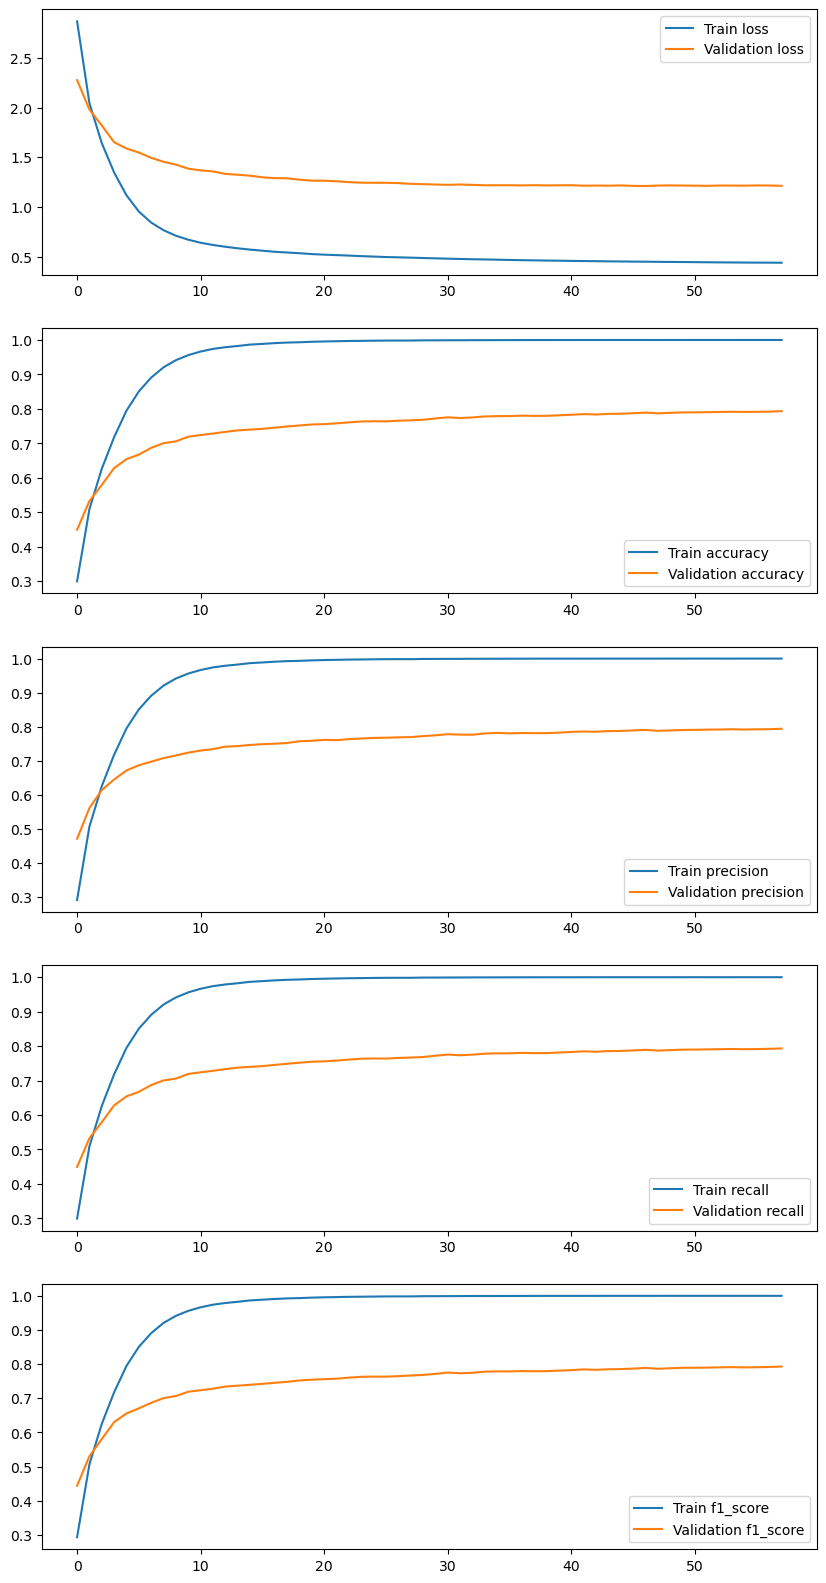

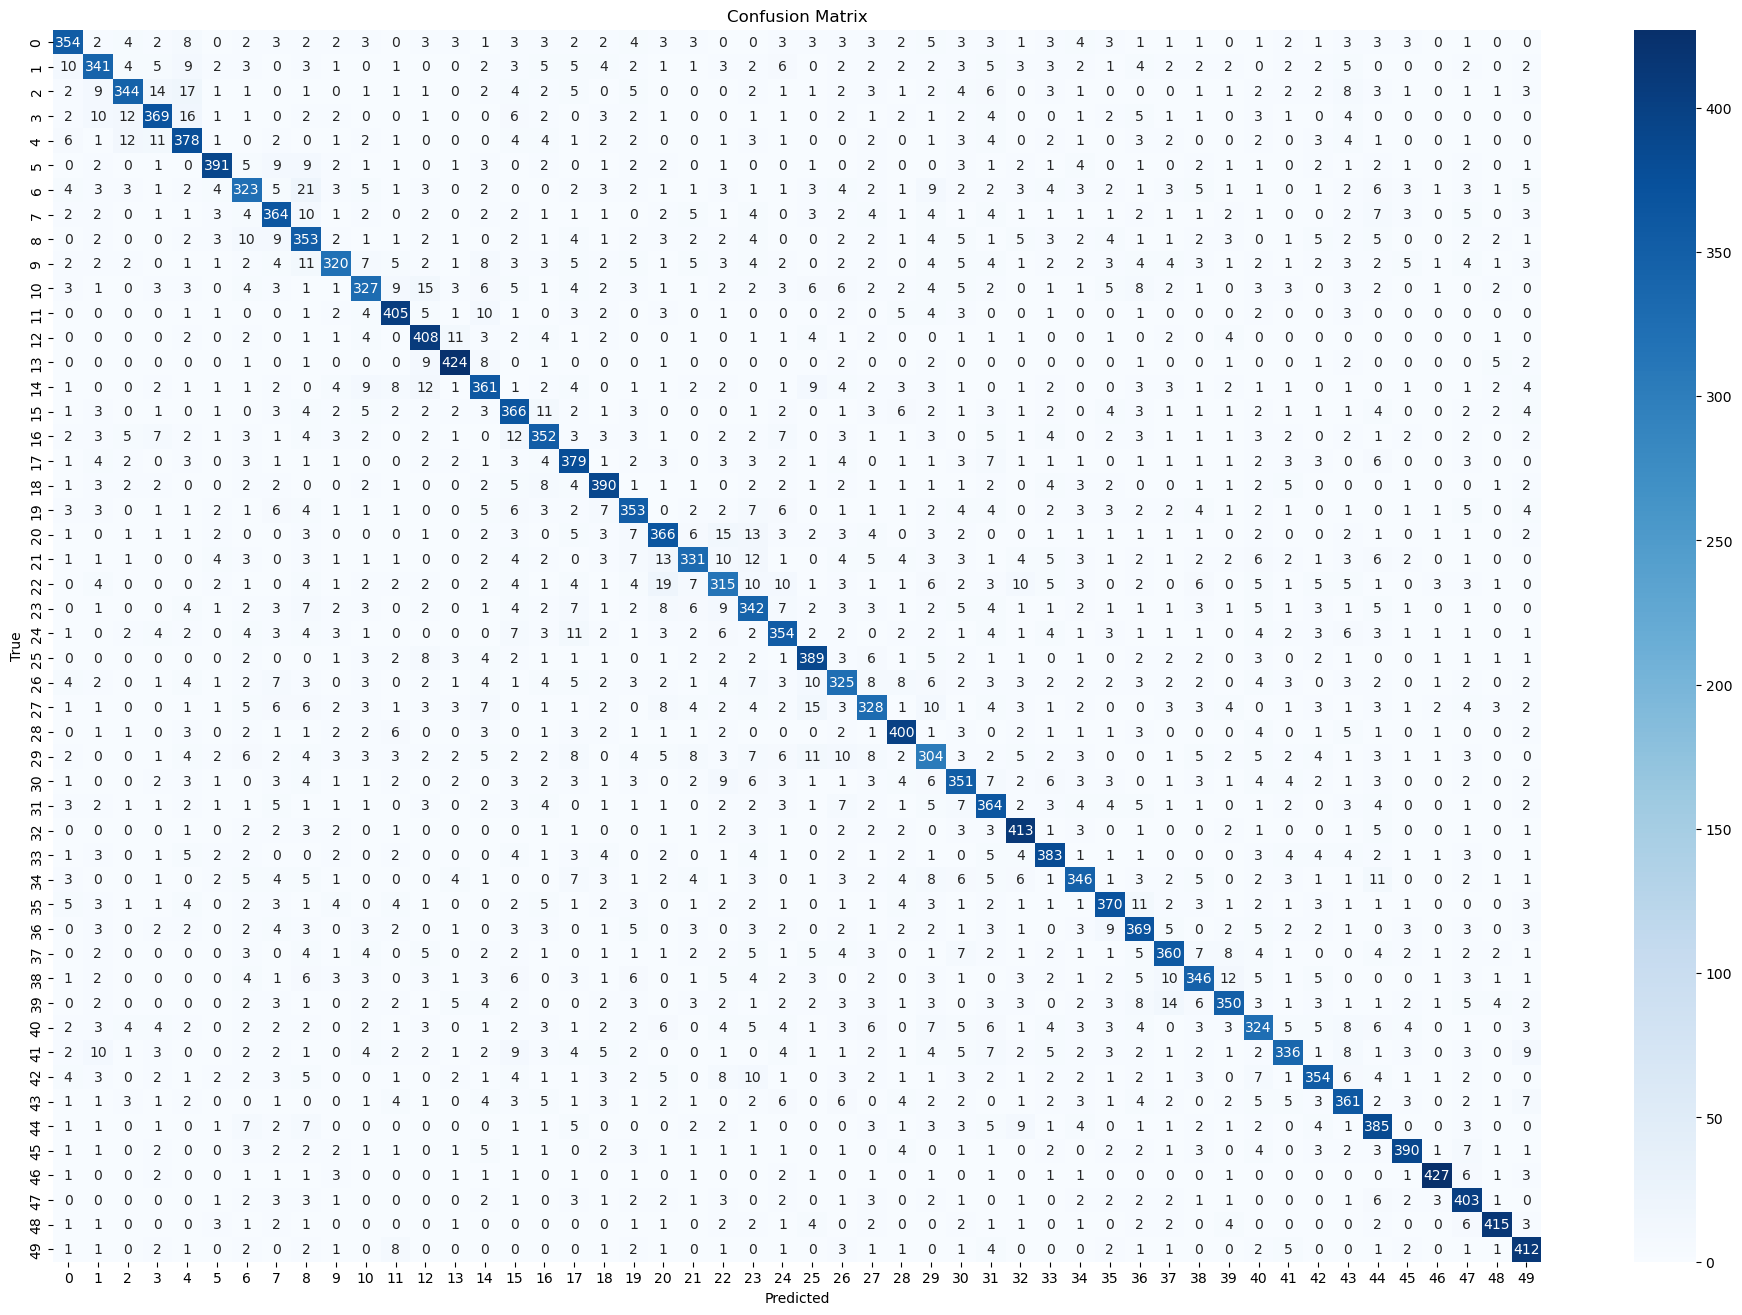

Saved fold 5 model to ../models/ensemble_mlp_fold_4.pth

Ensemble training complete! Trained 5 models.



([[{'loss': 2.847629540532992,
    'accuracy': 0.30112430137342405,
    'precision': np.float64(0.2918305395700775),
    'recall': np.float64(0.3011187918740761),
    'f1_score': np.float64(0.2941604787965172)},
   {'loss': 2.0406001206919635,
    'accuracy': 0.5100407261383822,
    'precision': np.float64(0.5082491028363381),
    'recall': np.float64(0.5100367404327245),
    'f1_score': np.float64(0.5082371353429215)},
   {'loss': 1.6383371998591976,
    'accuracy': 0.6271933625059573,
    'precision': np.float64(0.6264112765954617),
    'recall': np.float64(0.6271908141361021),
    'f1_score': np.float64(0.6263527321952194)},
   {'loss': 1.3407609271739729,
    'accuracy': 0.720321909795936,
    'precision': np.float64(0.7200080020128091),
    'recall': np.float64(0.720317813312673),
    'f1_score': np.float64(0.719939556046478)},
   {'loss': 1.119308289572679,
    'accuracy': 0.7916359776439496,
    'precision': np.float64(0.7915297674357913),
    'recall': np.float64(0.791634474202

In [5]:
config_path = "../configs/ensemble_config.json"
ensemble_config = EnsembleMLPConfig.load_from_config(config_path)
ensemble_model = EnsembleMLP(ensemble_config)
ensemble_model.train(X, y)

In [6]:
X, test_ids = load_test_data(None, return_ids=True)
_ = ensemble_model.test(X, ids=test_ids)

Got predictions from fold 1 model
Got predictions from fold 2 model
Got predictions from fold 3 model
Got predictions from fold 4 model
Got predictions from fold 5 model
Saved ensemble predictions to ../submissions/test_predictions_ensemble.csv
